## GAHN Alioune
## DIALLO Aicha

In [ ]:
import pandas as pd
import numpy as np

In [6]:
text1 =  'A chaque ville, son explication. Les gares sur l’axe Atlantique (Toulouse, Tours et Bordeaux) ont par exemple été touchées par les travaux de la LGV Sud-Europe Atlantique, reliant Paris à Bordeaux en 2h, inaugurée au début du mois de juillet. Toulouse, relié à Paris via Bordeaux en TGV, a donc fait les frais de cette entreprise, débutée en 2012.'

In [7]:
def cleantext(text):
    text = "".join([x if (x.isalpha() ) else " " for x in text])
    text = " ".join(text.split())
    return text

In [8]:
text1 =cleantext(text1)

**question 1 :** Faisons un script permettant de calculer la frequence entre deux mots avec une fenetre glissante. ici la taille 
de la fenetre vaut 5

In [9]:
n = 5
words = text1.split(' ')
f=[]
for i in range(len(words)-n+1):
    f.append(words[i:i+n])

In [11]:
# Permet de calculer la frequence entre deux mots dans un fenetre
def calculproba (mots1, mots2, f):
    s = 0
    for k in f:
        if (mots1 in k) and (mots2 in k):
            s = s+1 
    return s/ len(f)
    

In [12]:
# Permet de calculer la frequence d'un mots dans un fenetre
def calculproba_m (mots2, f):
    s = 0
    for k in f:
        if (mots2 in k):
            s = s+1 
    return s/ len(f)

In [13]:
calculproba('Toulouse','Bordeaux', f)

0.03571428571428571

**question 2)** Faisons un script permettant de calculer le ppmi entre tous les mots 

In [14]:
def calculppmi (words,f):
    ppmi = {}
    for i,k in enumerate(np.unique(words)):
        ppmi[i] = []
        for j in words:
            if (calculproba (k, j, f))== 0:
                ppmi[i].append( 0)
            else:
                lol = np.log(calculproba (k, j, f)/ (calculproba_m (k, f)*calculproba_m (j, f)))
                if lol > 0:
                    ppmi[i].append( lol)
                else:
                    ppmi[i].append( 0)
    return(ppmi)

In [27]:
np.log(calculproba ('Toulouse', 'Bordeaux', f)/ (calculproba_m ('Toulouse', f)*calculproba_m ('Bordeaux', f)))

-0.29213642280116114

In [16]:
ppmi =calculppmi(words,f)

In [28]:
# Permets de le dictionnaire obtenu precedemment sous forme de matrice
def transform_matrxi(dico):
    s= []
    for k in dico.keys(): 
        s.append(dico[k])
    return(s)

In [18]:
ppmi_mat = transform_matrxi(ppmi)

In [19]:
dic ={}
for i,k in enumerate(np.unique(words)):
    if k in ['Toulouse', 'Bordeaux', 'TGV', 'LGV','Tours']:
        dic[k] = i
dic

{'Bordeaux': 2, 'LGV': 4, 'TGV': 8, 'Toulouse': 9, 'Tours': 10}

In [34]:
np.unique(words)

array(['A', 'Atlantique', 'Bordeaux', 'Europe', 'LGV', 'Les', 'Paris',
       'Sud', 'TGV', 'Toulouse', 'Tours', 'a', 'au', 'axe', 'cette',
       'chaque', 'de', 'donc', 'du', 'début', 'débutée', 'en',
       'entreprise', 'et', 'exemple', 'explication', 'fait', 'frais',
       'gares', 'h', 'inaugurée', 'juillet', 'l', 'la', 'les', 'mois',
       'ont', 'par', 'reliant', 'relié', 'son', 'sur', 'touchées',
       'travaux', 'via', 'ville', 'à', 'été'], dtype='<U11')

**question 3)** Projettons le résultat pour les mots dans deux dimensions en utilisant une PCA

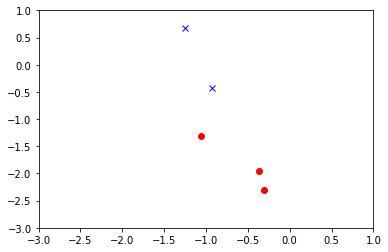

In [57]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = np.array(ppmi_mat)
pca = PCA(n_components=2)
Xp = pca.fit_transform(X)

villes = [2,9,10]
train = [4,8]


plt.plot([x[0] for x in Xp[villes]],[x[1] for x in Xp[villes]], 'ro')
plt.plot([x[0] for x in Xp[train]],[x[1] for x in Xp[train]], 'bx')
plt.axis([-3, 1, -3, 1])
plt.show()

**question 4)** Oui les points vont se deplacer car on a pas les memes frequences

**question 5-6)** Faisons la meme chose en utilisant wordnet sur les jours de semaine et les mois de l'année

In [39]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/sid2018-1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
from nltk.corpus import wordnet
six = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday','january','february','march','april','may','june','july','august','september','october','november','december']
def wornet (words):
    ppmi = {}
    for k in (words):
        ppmi[k] = []
        for j in words:
            lol = wordnet.synsets(k)[0].path_similarity(wordnet.synsets(j)[0])
            ppmi[k].append(lol)
    return(ppmi)

In [41]:
w =wornet(six)

In [42]:
dic ={}
for i,k in enumerate(w):
    if k in ['monday', 'tuesday', 'january', 'december']:
        dic[k] = i
dic

{'monday': 0, 'tuesday': 1, 'january': 7, 'december': 18}

In [29]:
# Transformons le dictionnaire obtenu precedemment en matrice
def transform_matrxi(dico):
    s= []
    for k in dico.keys(): 
        s.append(dico[k])
    return(s)

In [44]:
s1 = transform_matrxi(w)

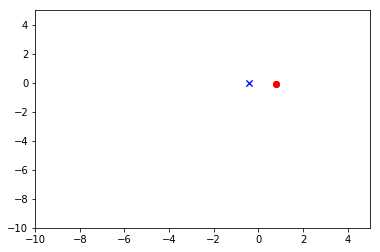

In [50]:
X = np.array(s1)
pca = PCA(n_components=2)
Xp = pca.fit_transform(X)

day = [0,1]
month = [7,18]


plt.plot([x[0] for x in Xp[day]],[x[1] for x in Xp[day]], 'ro')
plt.plot([x[0] for x in Xp[month]],[x[1] for x in Xp[month]], 'bx')
plt.axis([-10, 5, -10, 5])
plt.show()

Lorsque nous faisons la projection sur deux dimensions nous remarquons que les jours de semaine sont rassemblés aux même 
endroits(en bleu) ainsi que les mois de l'année (en rouge) 

#### Question 7): Words Embeddings

In [58]:
# Chargeons le modèle Pré-entrainé
embeddings_index = dict()
f = open('/home/sid2018-1/Téléchargements/glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [59]:
w2v =embeddings_index

Calculons le vecteur comme demandé

In [64]:
vect = w2v['paris'] - w2v['france'] + w2v['italy']

In [65]:
vect

array([ 1.8745801 ,  0.10496998, -1.03622   ,  0.25106996,  0.22431102,
       -1.138022  , -0.382536  , -0.24625999, -1.66036   ,  0.265395  ,
        0.01822996, -0.9849601 , -0.82812995,  0.19924003,  1.26399   ,
       -0.58509004, -0.65232396,  0.36294997, -0.76094997,  0.58698   ,
        1.059536  ,  0.43135995, -0.98424995,  1.0534599 , -0.07415444,
       -0.7853    ,  0.24133   ,  0.13991   , -1.066     , -0.16579002,
        2.1221998 ,  0.47884002, -0.08396003, -0.31962   , -0.51839   ,
       -0.09081994,  0.23820001,  1.25531   ,  0.27991003,  0.27306002,
       -0.17276993, -0.04297298,  0.6049999 , -0.63269997, -0.14311601,
        0.58087504, -0.05184001, -1.03605   ,  0.99171   , -0.65349996],
      dtype=float32)

In [85]:
# Mettons tous les capitaux dans une meme liste
capi = "Tirana,Vienna,Minsk,Brussels,Sarajevo,Sofia,Zagreb,Nicosia,Prague,Copenhagen,Tallinn,Helsinki,Paris,Berlin,Gibraltar,Athens,Budapest,Reykjavik,Dublin,Douglas,Rome,Riga,Vaduz,Vilnius,Luxembourg,Skopje,Valletta,Monaco,Podgorica,Amsterdam,Oslo,Warsaw,Lisbon,Bucharest,Moscow,Belgrade,Bratislava,Ljubljana,Madrid,Stockholm,Bern,Kiev,London"
capi = [x.lower() for x in capi.split(',')]

In [30]:
# Fonction pour calculer la similarité cosinus
from scipy import spatial
def simi(v1, vect):
    return 1 - spatial.distance.cosine(w2v[v1],vect)

In [87]:
# Calculons les similarités entre les capitaux et le vecteur calculé
listesim = [simi(val,vect) for val in capi]

In [88]:
len(capi)

43

In [89]:
odr = []
k = len(capi)
while (k >= 1):
    for i,j in enumerate(listesim): 
        if j == max(listesim):
            odr.append(capi[i])
            del listesim[i]
            del capi[i]
            k = k-1
    
        

In [92]:
odr

['rome',
 'paris',
 'madrid',
 'amsterdam',
 'lisbon',
 'budapest',
 'berlin',
 'prague',
 'vienna',
 'brussels',
 'stockholm',
 'bucharest',
 'athens',
 'sofia',
 'copenhagen',
 'luxembourg',
 'london',
 'monaco',
 'moscow',
 'bratislava',
 'helsinki',
 'ljubljana',
 'kiev',
 'bern',
 'tirana',
 'nicosia',
 'warsaw',
 'tallinn',
 'belgrade',
 'dublin',
 'vilnius',
 'minsk',
 'zagreb',
 'riga',
 'oslo',
 'skopje',
 'reykjavik',
 'vaduz',
 'gibraltar',
 'valletta',
 'podgorica',
 'sarajevo',
 'douglas']

#### Oui on note des régularités. La méthode nous dit que le vecteur représentant Rome est plus proche du vecteur resultant de l'opération 'Paris' - 'France' + 'Italy', Ce qui est plausible